# Principal Component Analysis

1. Standardize the data. (with mean=0 and variance=1)

2. Compute covariance matrix of dimensions.

3. Obtain the Eigenvectors and Eigenvalues from the covariance matrix.

4. Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k largest eigenvalues  
(k will become the number of dimensions of the new feature subspace k ≤ d, d is the number of original dimensions).

5. Construct the projection matrix W from the selected k Eigenvectors.

6. Transform the original data set X via W to obtain the new k-dimensional feature subspace Y.

Dataset used: https://www.kaggle.com/andrewmvd/fetal-health-classification  
Reference: https://ashutoshtripathi.com/2019/07/11/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning/

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_rows', 10)

In [2]:
data = pd.read_csv('fetal_health.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

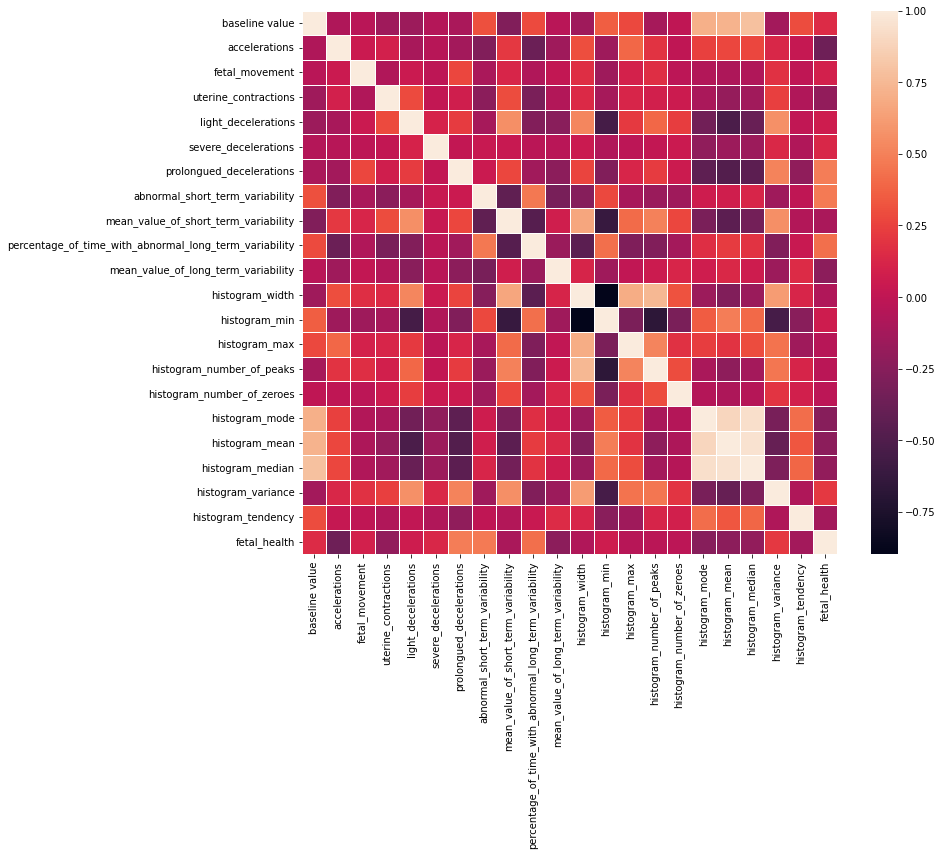

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), linewidth=0.5)
plt.show()

In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [6]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [7]:
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

## STEP 1: Standardize the data

In [8]:
standard_X = StandardScaler().fit_transform(X)
standard_X

array([[-1.35222005, -0.8223883 , -0.20320955, ..., -1.18164215,
         1.87056871,  1.11298001],
       [-0.1325256 ,  0.73013282, -0.20320955, ...,  0.13203796,
        -0.23499819, -0.52452553],
       [-0.03088439, -0.04612774, -0.20320955, ..., -0.00624416,
        -0.2004807 , -0.52452553],
       ...,
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.96173066,
        -0.51113811,  1.11298001],
       [ 0.68060404, -0.56363478, -0.20320955, ...,  0.8925896 ,
        -0.51113811,  1.11298001],
       [ 0.88388645, -0.30488126, -0.16034157, ...,  0.47774325,
        -0.61469058, -0.52452553]])

## STEP 2: Covariance matrix

In [9]:
cov_mat= np.cov(standard_X, rowvar=False)
cov_mat

array([[ 1.00047059e+00, -8.05976389e-02, -3.34522150e-02,
        -1.46442153e-01, -1.59106716e-01, -5.35427346e-02,
        -1.04646317e-01,  3.05713827e-01, -2.79738177e-01,
         2.85763992e-01, -3.21061244e-02, -1.47748258e-01,
         3.61789670e-01,  2.75239258e-01, -1.13986939e-01,
        -4.74681606e-03,  7.09326144e-01,  7.23461331e-01,
         7.89617817e-01, -1.34001084e-01,  2.93641605e-01],
       [-8.05976389e-02,  1.00047059e+00,  4.82572747e-02,
         8.97164321e-02, -1.08665865e-01, -4.30383610e-02,
        -1.27808741e-01, -2.79709038e-01,  2.07267238e-01,
        -3.74118983e-01, -1.42430113e-01,  2.98771557e-01,
        -1.54358935e-01,  3.94332254e-01,  1.90541569e-01,
        -6.14945913e-03,  2.43724630e-01,  2.70461645e-01,
         2.72977529e-01,  1.25763118e-01,  2.84332112e-02],
       [-3.34522150e-02,  4.82572747e-02,  1.00047059e+00,
        -6.88110875e-02,  4.92516619e-02, -1.09807959e-02,
         2.66047211e-01, -1.03764226e-01,  1.21371303e

## STEP 3: Eigenvectors and eigenvalues

In [10]:
cov_mat = np.cov(standard_X.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

### Eigen vectors

In [11]:
eig_vecs

array([[ 2.24145753e-01, -2.77316446e-01,  3.40074811e-01,
        -5.95429042e-02, -8.20063573e-02,  2.57218454e-02,
        -2.45070907e-01, -1.88532880e-01, -9.64925996e-02,
         7.68636943e-02,  1.85263714e-01, -1.18277916e-01,
        -1.03544567e-01, -1.25228474e-01, -7.49018834e-02,
         2.30236640e-01, -3.56729009e-01, -4.76779792e-01,
         9.06028031e-02, -3.73268737e-01,  7.95451463e-16],
       [-4.34230370e-02, -2.78636681e-01, -1.86841014e-01,
         4.35785372e-01,  1.05234139e-01, -1.07714045e-01,
         4.30842707e-01,  1.18177888e-01,  2.65038762e-01,
         1.44962871e-01, -5.72455029e-02,  9.79707720e-02,
         2.13376802e-01, -1.36590272e-01,  3.84843170e-02,
         5.03959419e-01, -1.30019440e-01,  4.69662660e-02,
         6.01687768e-03, -1.74541416e-01,  2.34055033e-16],
       [-8.06447862e-02, -3.84251949e-02,  1.01702096e-01,
         4.77297897e-03,  6.33874508e-01,  1.80036027e-01,
        -2.49389615e-02, -4.83887957e-01,  2.53602045e

### Eigenvalues

In [12]:
eig_vals

array([6.06120220e+00, 3.50943021e+00, 1.82518111e+00, 1.49742335e+00,
       1.21893236e+00, 1.02065245e+00, 9.82233269e-01, 9.26968480e-01,
       7.62786850e-01, 6.40505823e-01, 5.77555709e-01, 4.97548621e-01,
       3.88685694e-01, 3.27185462e-01, 2.65555690e-01, 1.80902355e-01,
       1.33209984e-01, 1.17583404e-01, 2.68017419e-02, 4.95375945e-02,
       2.01073139e-16])

## STEP 4: Selecting the principal components

In [13]:
# list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
for i in range(len(eig_pairs)):
    print(f'\nPAIR {i+1}\n{eig_pairs[i]}')


PAIR 1
(6.061202195333202, array([ 0.22414575, -0.04342304, -0.08064479, -0.12739761, -0.27864325,
       -0.05774405, -0.20281659,  0.1455183 , -0.31629476,  0.2170621 ,
        0.00805394, -0.31355241,  0.3320773 , -0.13365758, -0.25113959,
       -0.12317482,  0.26256732,  0.30881496,  0.27600638, -0.29068124,
        0.07034418]))

PAIR 2
(3.5094302071680805, array([-0.27731645, -0.27863668, -0.03842519, -0.02719232, -0.02061278,
        0.07826402,  0.11361498,  0.12229261, -0.13501094,  0.14081113,
       -0.09637642, -0.2828591 ,  0.14243349, -0.3794326 , -0.23999005,
       -0.12709651, -0.36723858, -0.32568206, -0.37615779, -0.1001379 ,
       -0.22586159]))

PAIR 3
(1.8251811129350612, array([ 0.34007481, -0.18684101,  0.1017021 , -0.12082668,  0.2008359 ,
        0.07113046,  0.3367459 ,  0.49174769, -0.07459121,  0.32063285,
       -0.43217176,  0.063889  ,  0.02908304,  0.18660872,  0.10752949,
       -0.00377186,  0.02327127, -0.02215301,  0.06564271,  0.26559578,
      

### Eigenvalues in descending order

In [14]:
eig_pairs.sort()
eig_pairs.reverse()

for i in eig_pairs:
    print(i[0])

6.061202195333202
3.5094302071680805
1.8251811129350612
1.497423350997537
1.2189323552484788
1.0206524545038826
0.9822332688030232
0.9269684804576904
0.7627868497457775
0.6405058229085154
0.5775557085071128
0.4975486206119996
0.3886856937854915
0.32718546220091904
0.2655556903610898
0.18090235524811868
0.13320998373001067
0.11758340399873547
0.04953759450528708
0.026801741891167633
2.0107313906176306e-16


### Chossing number of principal components

In [15]:
total = sum(eig_vals)
print("Total of eigen values: ", total)

Total of eigen values:  21.00988235294118


In [16]:
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
print("Variance Explained\n", var_exp)

Variance Explained
 [28.849291459667274, 16.703711844806186, 8.687250515134624, 7.127233393517371, 5.801709570628986, 4.857963682795212, 4.6751012323756305, 4.412059357999802, 3.6306098098592865, 3.0485930960905683, 2.7489716448900565, 2.3681647153171594, 1.8500136614571727, 1.5572931666374432, 1.2639561036090932, 0.861034594145617, 0.6340348864988412, 0.5596576031387198, 0.23578235076767243, 0.12756731066328722, 9.570407662640472e-16]


In [17]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained\n", cum_var_exp)

Cumulative Variance Explained
 [ 28.84929146  45.5530033   54.24025382  61.36748721  67.16919678
  72.02716047  76.7022617   81.11432106  84.74493087  87.79352396
  90.54249561  92.91066032  94.76067398  96.31796715  97.58192325
  98.44295785  99.07699274  99.63665034  99.87243269 100.
 100.        ]


In [18]:
# taking k = 12
print("Percentage of variance the first two principal components each contain\n", var_exp[0:12])
print("\n\nPercentage of variance the first two principal components together contain\n", sum(var_exp[0:12]))

Percentage of variance the first two principal components each contain
 [28.849291459667274, 16.703711844806186, 8.687250515134624, 7.127233393517371, 5.801709570628986, 4.857963682795212, 4.6751012323756305, 4.412059357999802, 3.6306098098592865, 3.0485930960905683, 2.7489716448900565, 2.3681647153171594]


Percentage of variance the first two principal components together contain
 92.91066032308217


## STEP 5: Projection matrix W

In [19]:
# selected k = 12
matrix_w = np.hstack(
    (
        eig_pairs[0][1].reshape(21,1),
        eig_pairs[1][1].reshape(21,1),
        eig_pairs[2][1].reshape(21,1),
        eig_pairs[3][1].reshape(21,1),
        eig_pairs[4][1].reshape(21,1),
        eig_pairs[5][1].reshape(21,1),
        eig_pairs[6][1].reshape(21,1),
        eig_pairs[7][1].reshape(21,1),
        eig_pairs[8][1].reshape(21,1),
        eig_pairs[9][1].reshape(21,1),
        eig_pairs[10][1].reshape(21,1),
        eig_pairs[11][1].reshape(21,1),
    )
)

# hstack: Stacks arrays in sequence horizontally (column wise).
matrix_w

array([[ 0.22414575, -0.27731645,  0.34007481, -0.0595429 , -0.08200636,
         0.02572185, -0.24507091, -0.18853288, -0.0964926 ,  0.07686369,
         0.18526371, -0.11827792],
       [-0.04342304, -0.27863668, -0.18684101,  0.43578537,  0.10523414,
        -0.10771404,  0.43084271,  0.11817789,  0.26503876,  0.14496287,
        -0.0572455 ,  0.09797077],
       [-0.08064479, -0.03842519,  0.1017021 ,  0.00477298,  0.63387451,
         0.18003603, -0.02493896, -0.48388796,  0.25360205, -0.38274698,
        -0.24205799, -0.17271457],
       [-0.12739761, -0.02719232, -0.12082668,  0.29793074, -0.46137962,
         0.34219163, -0.22947439, -0.28327143, -0.0911396 ,  0.03610201,
        -0.60588028,  0.15489315],
       [-0.27864325, -0.02061278,  0.2008359 , -0.07795125, -0.35425291,
         0.17851786,  0.03983251, -0.08711606, -0.00654193, -0.39363378,
         0.27745946, -0.28598908],
       [-0.05774405,  0.07826402,  0.07113046, -0.03629225, -0.2002701 ,
        -0.706669  ,  

## STEP 6: Projection onto new feature space

In [20]:
matrix_projection = standard_X.dot(matrix_w)
matrix_projection.shape

(2126, 12)

In [21]:
X_pca = pd.DataFrame(
    data=matrix_projection,
    columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12']
)
X_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,0.263977,2.568375,1.302902,-1.826119,0.379183,0.326087,2.254560,0.533575,0.252293,0.456495,0.232581,1.324954
1,-1.954458,-2.230317,-1.090115,0.501233,-0.226035,-0.672451,-0.793729,0.555810,0.236623,-0.550629,0.012450,0.275320
2,-1.971485,-1.968333,-1.286533,0.210096,-0.554692,-0.411061,-1.554747,0.145268,-0.204309,-0.554284,-0.247613,0.291970
3,-2.222056,-2.134027,-2.190836,-1.601091,-0.046659,0.428954,-0.507563,-0.390144,-1.804148,-0.229709,-0.698648,0.922679
4,-1.785438,-2.190154,-2.508413,-0.740641,0.267545,0.259766,0.109299,-0.243573,-1.238910,0.326136,-0.812357,1.224144
...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2.830562,-0.099646,1.441883,0.671104,-0.505667,-0.153606,-0.888821,0.166277,-0.759249,-0.180270,-1.546979,-0.264647
2122,2.031993,-0.860059,1.244167,-0.558820,-0.560077,0.459273,0.358088,0.002021,-0.818504,0.344133,-1.787319,-0.076574
2123,2.110176,-0.850040,1.305417,-0.402711,-0.632609,0.501208,0.397261,-0.058815,-0.756095,0.405486,-1.666472,-0.217193
2124,2.104270,-0.793400,1.390622,-0.711009,-0.407499,0.342560,0.442023,0.134593,-0.765396,0.239976,-1.601469,0.073247


In [22]:
data_pca = pd.concat([X_pca, y], axis=1)
data_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,fetal_health
0,0.263977,2.568375,1.302902,-1.826119,0.379183,0.326087,2.254560,0.533575,0.252293,0.456495,0.232581,1.324954,2.0
1,-1.954458,-2.230317,-1.090115,0.501233,-0.226035,-0.672451,-0.793729,0.555810,0.236623,-0.550629,0.012450,0.275320,1.0
2,-1.971485,-1.968333,-1.286533,0.210096,-0.554692,-0.411061,-1.554747,0.145268,-0.204309,-0.554284,-0.247613,0.291970,1.0
3,-2.222056,-2.134027,-2.190836,-1.601091,-0.046659,0.428954,-0.507563,-0.390144,-1.804148,-0.229709,-0.698648,0.922679,1.0
4,-1.785438,-2.190154,-2.508413,-0.740641,0.267545,0.259766,0.109299,-0.243573,-1.238910,0.326136,-0.812357,1.224144,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2.830562,-0.099646,1.441883,0.671104,-0.505667,-0.153606,-0.888821,0.166277,-0.759249,-0.180270,-1.546979,-0.264647,2.0
2122,2.031993,-0.860059,1.244167,-0.558820,-0.560077,0.459273,0.358088,0.002021,-0.818504,0.344133,-1.787319,-0.076574,2.0
2123,2.110176,-0.850040,1.305417,-0.402711,-0.632609,0.501208,0.397261,-0.058815,-0.756095,0.405486,-1.666472,-0.217193,2.0
2124,2.104270,-0.793400,1.390622,-0.711009,-0.407499,0.342560,0.442023,0.134593,-0.765396,0.239976,-1.601469,0.073247,2.0


## Testing the model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print('Train features  :', x_train.shape)
print('Train labels    :', y_train.shape)
print('\nTest features   :', x_test.shape)
print('Test labels     :', y_test.shape)

Train features  : (1488, 21)
Train labels    : (1488,)

Test features   : (638, 21)
Test labels     : (638,)


In [25]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=100)

print('Train features  :', x_train_pca.shape)
print('Train labels    :', y_train_pca.shape)
print('\nTest features   :', x_test_pca.shape)
print('Test labels     :', y_test_pca.shape)

Train features  : (1488, 12)
Train labels    : (1488,)

Test features   : (638, 12)
Test labels     : (638,)


In [26]:
model = GaussianNB().fit(x_train, y_train)
model_pca = GaussianNB().fit(x_train_pca, y_train_pca)

In [27]:
y_pred = model.predict(x_test)
y_pred_pca = model_pca.predict(x_test_pca)

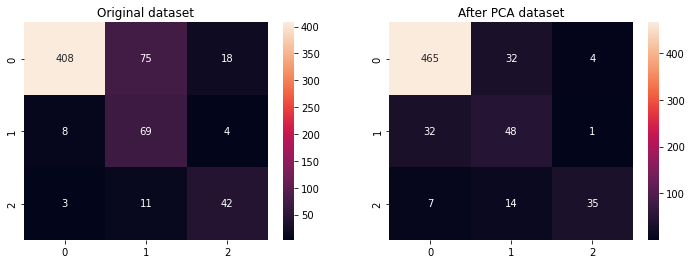

,Original dataset,After PCA dataset
Accuracy,81.347962,85.893417
Precision,0.878770,0.866135
Recall,0.813480,0.858934
F1 score,0.832178,0.860313


In [28]:
conf = confusion_matrix(y_test, y_pred)
conf_pca = confusion_matrix(y_test_pca, y_pred_pca)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(conf, annot=True, fmt="d", ax=ax1)
ax1.title.set_text('Original dataset')
sns.heatmap(conf_pca, annot=True, fmt="d", ax=ax2)
ax2.title.set_text('After PCA dataset')
plt.show()

acc = model.score(x_test, y_test)*100
prec = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

acc_pca = model_pca.score(x_test_pca, y_test_pca)*100
prec_pca = precision_score(y_test_pca, y_pred_pca, average='weighted')
recall_pca = recall_score(y_test_pca, y_pred_pca, average='weighted')
f1_pca = f1_score(y_test_pca, y_pred_pca, average='weighted')

df = pd.DataFrame.from_dict(
    {
        'Original dataset': [acc, prec, recall, f1],
        'After PCA dataset': [acc_pca, prec_pca, recall_pca, f1_pca]
    }
)
df.index = ['Accuracy', 'Precision', 'Recall', 'F1 score']
df